In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.1/752.1 kB 39.1 MB/s eta 0:00:00


In [2]:
!pip install tensorflow==2.13.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 27.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import wandb
from kaggle_secrets import UserSecretsClient
from ultralytics import YOLO

In [4]:
user_secrets = UserSecretsClient()

my_secret = user_secrets.get_secret("wandb_api_key") 

wandb.login(key=my_secret)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

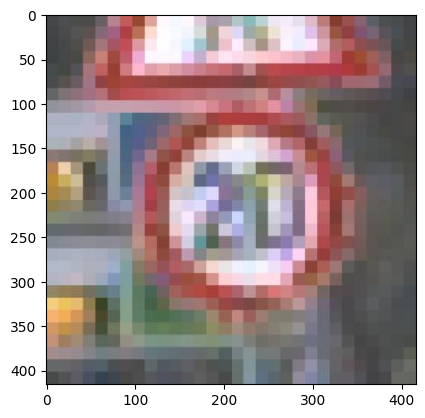

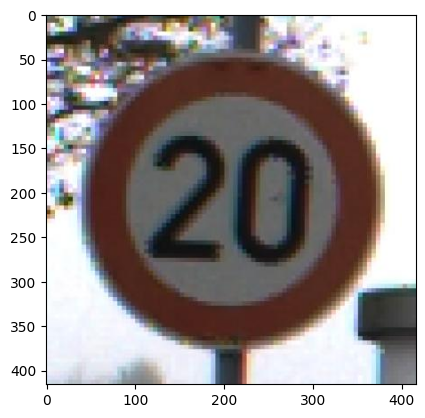

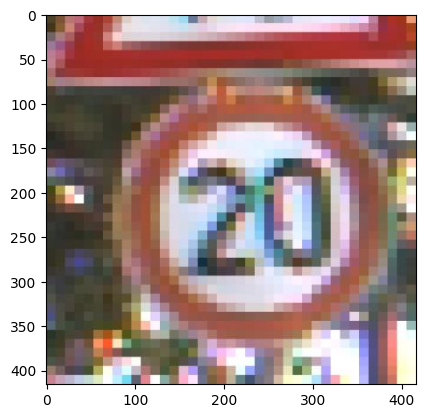

In [5]:
sample1 = mpimg.imread('/kaggle/input/cardetection/train/images/00000_00000_00001_png.rf.8bc8cc5e727cfd7e81b5184a15dd6fc1.jpg')
sample2 = mpimg.imread('/kaggle/input/cardetection/test/images/00000_00002_00026_png.rf.092c69361ef48fd43b479aa48fc829d9.jpg')
sample3 = mpimg.imread('/kaggle/input/cardetection/valid/images/00000_00001_00017_png.rf.2512e4fa7c72637e03252940dd911882.jpg')
plt.imshow(sample1)
plt.show()
plt.imshow(sample2)
plt.show()
plt.imshow(sample3)
plt.show()

In [6]:
# Load a model
model = YOLO('yolov8n.pt')


# Train the model
results = model.train(data='/kaggle/input/cardetection/data.yaml', epochs=20, imgsz=640)

100%|██████████| 6.23M/6.23M [00:00<00:00, 288MB/s]


Ultralytics YOLOv8.2.4 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/cardetection/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 73.8MB/s]
2024-04-28 08:53:08,265	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-28 08:53:09,650	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

wandb: Currently logged in as: m4257066 (hjty). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240428_085314-f4n6p4ge
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train
wandb: ⭐️ View project at https://wandb.ai/hjty/YOLOv8
wandb: 🚀 View run at https://wandb.ai/hjty/YOLOv8/runs/f4n6p4ge


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/cardetection/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:24<00:00, 143.94it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:05<00:00, 147.62it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.42G     0.8484      3.453      1.183         24        640: 100%|██████████| 221/221 [00:45<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.05it/s]


                   all        801        944      0.257      0.504      0.267      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.33G     0.7496      2.513        1.1         18        640: 100%|██████████| 221/221 [00:41<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.25it/s]

                   all        801        944       0.31       0.56      0.374      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.33G      0.742       2.15      1.082         28        640: 100%|██████████| 221/221 [00:41<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.23it/s]

                   all        801        944      0.458       0.61      0.546      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.33G     0.7084      1.832      1.054         22        640: 100%|██████████| 221/221 [00:41<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.20it/s]

                   all        801        944      0.621      0.673       0.68       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.33G     0.6883      1.553      1.044         21        640: 100%|██████████| 221/221 [00:41<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  5.19it/s]

                   all        801        944      0.776      0.664      0.759      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.32G     0.6728       1.37      1.034         24        640: 100%|██████████| 221/221 [00:40<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.37it/s]

                   all        801        944      0.778      0.779       0.83      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.36G     0.6626      1.242      1.033         22        640: 100%|██████████| 221/221 [00:40<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.31it/s]

                   all        801        944      0.854      0.756      0.851      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.33G     0.6421      1.128      1.024         24        640: 100%|██████████| 221/221 [00:40<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.36it/s]

                   all        801        944      0.865      0.772      0.856      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.33G     0.6316       1.06      1.016         30        640: 100%|██████████| 221/221 [00:40<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.27it/s]

                   all        801        944      0.911      0.797      0.899       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.32G     0.6284      1.001      1.006         21        640: 100%|██████████| 221/221 [00:40<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.42it/s]

                   all        801        944      0.935      0.815      0.906      0.768


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.36G     0.6182     0.7929     0.9815         10        640: 100%|██████████| 221/221 [00:41<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.28it/s]

                   all        801        944      0.894      0.801      0.892      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.33G      0.606     0.7205      0.971         10        640: 100%|██████████| 221/221 [00:40<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.40it/s]

                   all        801        944      0.913      0.844      0.916      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.33G     0.5883     0.6687     0.9607         11        640: 100%|██████████| 221/221 [00:39<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.45it/s]

                   all        801        944      0.932      0.811      0.911      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.33G     0.5781     0.6241     0.9548         14        640: 100%|██████████| 221/221 [00:40<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.42it/s]

                   all        801        944      0.935       0.84      0.928      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.36G     0.5691     0.5842      0.953         11        640: 100%|██████████| 221/221 [00:40<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.31it/s]

                   all        801        944       0.95      0.845      0.935      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.33G     0.5591      0.558     0.9483         10        640: 100%|██████████| 221/221 [00:40<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.30it/s]

                   all        801        944      0.912      0.863      0.933      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.33G     0.5445     0.5274     0.9336         11        640: 100%|██████████| 221/221 [00:40<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.35it/s]

                   all        801        944      0.938      0.876       0.94      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.32G     0.5369     0.5017      0.932         10        640: 100%|██████████| 221/221 [00:40<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  5.11it/s]

                   all        801        944      0.955       0.89      0.953       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.36G     0.5293     0.4788     0.9311         10        640: 100%|██████████| 221/221 [00:40<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.31it/s]

                   all        801        944      0.941      0.903      0.952      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.33G     0.5244     0.4652     0.9264         14        640: 100%|██████████| 221/221 [00:40<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.26it/s]

                   all        801        944      0.952      0.884      0.953      0.822



20 epochs completed in 0.263 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.4 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.78it/s]


                   all        801        944      0.948      0.886      0.953      0.822
           Green Light        801        122      0.849       0.74      0.839      0.505
             Red Light        801        108      0.867      0.713      0.804      0.478
       Speed Limit 100        801         52      0.909      0.966      0.987       0.89
       Speed Limit 110        801         17      0.873          1      0.995      0.913
       Speed Limit 120        801         60      0.955        0.9      0.988      0.895
        Speed Limit 20        801         56       0.99      0.982      0.986      0.865
        Speed Limit 30        801         74      0.962      0.946      0.981      0.923
        Speed Limit 40        801         55      0.973      0.909      0.983      0.868
        Speed Limit 50        801         71          1       0.82       0.95       0.85
        Speed Limit 60        801         76      0.972      0.911      0.958      0.866
        Speed Limit 7

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
wandb:                  lr/pg1 ▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
wandb:                  lr/pg2 ▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
wandb:        metrics/mAP50(B) ▁▂▄▅▆▇▇▇▇█▇█████████
wandb:     metrics/mAP50-95(B) ▁▂▄▅▆▇▇▇▇▇▇▇▇███████
wandb:    metrics/precision(B) ▁▂▃▅▆▆▇▇██▇█████████
wandb:       metrics/recall(B) ▁▂▃▄▄▆▅▆▆▆▆▇▆▇▇▇████
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▆▆▅▅▄▄▄▃▃▃▃▂▂▂▂▁▁▁▁
wandb:          train/cls_loss █▆▅▄▄▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁
wandb:          train/dfl_loss █▆▅▄▄▄▄▄▃▃▃▂▂▂▂▂▁▁▁▁
wandb:            val/box_loss ███▇▅▅▄▄▃▃▃▃▂▂▂▂▂▁▁▁
wandb:            val/cls_loss █▇▅▄▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
wandb:            val/dfl_loss ██▇▆▅▄▃▄▃▃▂▂▂▂▂▁▁▁▁▁
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 3e-05
wandb:                  lr/pg1 3e-05
wandb:  

In [7]:
# Load a model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt') 

# Validate the model
metrics = model.val() 

Ultralytics YOLOv8.2.4 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/cardetection/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 522.71it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:07<00:00,  6.93it/s]


                   all        801        944      0.953      0.884      0.953      0.823
           Green Light        801        122       0.87       0.73      0.834      0.502
             Red Light        801        108      0.875       0.71      0.804      0.482
       Speed Limit 100        801         52      0.909      0.962      0.987      0.896
       Speed Limit 110        801         17      0.908          1      0.995      0.909
       Speed Limit 120        801         60       0.96        0.9      0.988      0.895
        Speed Limit 20        801         56      0.991      0.982      0.986      0.869
        Speed Limit 30        801         74      0.964      0.946      0.981      0.921
        Speed Limit 40        801         55      0.978      0.909      0.983      0.871
        Speed Limit 50        801         71          1      0.814      0.949      0.849
        Speed Limit 60        801         76      0.972      0.908      0.959      0.864
        Speed Limit 7

In [8]:
model("/kaggle/input/cardetection/test/images/00000_00005_00003_png.rf.df858754a637fecb106924e9bc47a832.jpg", save=True)


image 1/1 /kaggle/input/cardetection/test/images/00000_00005_00003_png.rf.df858754a637fecb106924e9bc47a832.jpg: 640x640 1 Speed Limit 20, 6.1ms
Speed: 3.2ms preprocess, 6.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[70, 75, 76],
         [70, 75, 76],
         [70, 75, 76],
         ...,
         [69, 74, 75],
         [69, 74, 75],
         [69, 74, 75]],
 
        [[70, 75, 76],
         [70, 75, 76],
         [70, 75, 76],
         ...,
         [69, 74, 75],
         [69, 74, 75],
         [69, 74, 75]],
 
        [[70, 75, 76],
         [70, 75, 76],
         [70, 75, 76],
         ...,
         [69, 74, 75],
         [69, 74, 75],
         [69, 74, 75]],
 
        ...,
 
        [[60, 62, 62],
         [60, 62, 62],

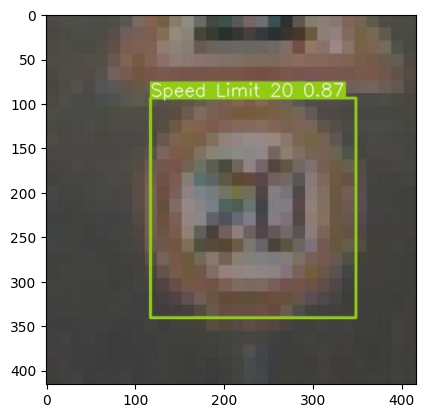

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
test = mpimg.imread('/kaggle/working/runs/detect/predict/00000_00005_00003_png.rf.df858754a637fecb106924e9bc47a832.jpg')
plt.imshow(test)

In [10]:
# Export the model
model.export(format='tflite')

Ultralytics YOLOv8.2.4 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/kaggle/working/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 19, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx2tf>=1.15.4,<=1.17.5', 'sng4onnx>=1.0.1', 'onnxsim>=0.4.33', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.8/127.8 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 230.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 196.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 209.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 MB 63.6 MB/s eta 0:00:00
   ━━

100%|██████████| 1.11M/1.11M [00:00<00:00, 86.5MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /kaggle/working/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 50.59file/s]


ONNX: starting export with onnx 1.16.0 opset 17...


ONNX: simplifying with onnxsim 0.4.36...
ONNX: export success ✅ 1.4s, saved as '/kaggle/working/runs/detect/train/weights/best.onnx' (11.7 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.17.5...
TensorFlow SavedModel: export success ✅ 45.8s, saved as '/kaggle/working/runs/detect/train/weights/best_saved_model' (29.5 MB)

TensorFlow Lite: starting export with tensorflow 2.13.1...
TensorFlow Lite: export success ✅ 0.0s, saved as '/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite' (11.7 MB)

Export complete (47.3s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640 data=/kaggle/input/cardetection/data.yaml  
Visualize:       https://netron.app


'/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite'